# MLP simples com a diferença


- 1 saida - DeltaTheta
- 2 entradas - Pwmd, Pwme 
- 1 camada
- 1 neurônio


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

Datasets = []
PREDICTORS = ["PwmD", "PwmE"]
TARGET = "Theta"       

for i in range(3):   
    Dataset = pd.read_csv(f"../Dados/Data{i + 1}.csv")
        
    # Ajusta índice pelo tempo
    Dataset.index = (np.arange(0, len(Dataset), 1).astype(float) * 0.07).round(5)    
    Datasets.append(Dataset)

    print(f"++++++++++++++++++++ Dataset {i+1} +++++++++++++++++++++++")
    print(Dataset.head(5))


++++++++++++++++++++ Dataset 1 +++++++++++++++++++++++
        X    Y  Theta    Wd   We  WdRef  WeRef   PwmD   PwmE
0.00  0.0  0.7   0.00  0.00  0.0  -0.00   0.00  -0.00   0.00
0.07  0.0  0.7   0.00  0.00  0.0   3.02   3.02  -0.00   0.00
0.14  0.0  0.7   0.00  0.00  0.0   3.02   3.02  45.32  45.32
0.21  0.0  0.7   0.01  0.36  0.0   3.02   3.02  45.32  45.32
0.28  0.0  0.7   0.01  0.20  0.0   2.99   3.02  57.60  63.38
++++++++++++++++++++ Dataset 2 +++++++++++++++++++++++
        X    Y  Theta    Wd   We  WdRef  WeRef   PwmD   PwmE
0.00  0.0  0.7    0.0  0.00  0.0  -0.00   0.00  -0.00   0.00
0.07  0.0  0.7    0.0  0.00  0.0   3.02   3.02  -0.00   0.00
0.14  0.0  0.7    0.0  0.00  0.0   3.02   3.02  45.32  45.32
0.21  0.0  0.7    0.0  0.03  0.0   3.02   3.02  45.32  45.32
0.28  0.0  0.7    0.0  0.00  0.0   3.02   3.02  63.00  63.44
++++++++++++++++++++ Dataset 3 +++++++++++++++++++++++
        X    Y  Theta   Wd   We  WdRef  WeRef   PwmD   PwmE
0.00  0.0  0.7    0.0  0.0  0.0  -0.00   0.

In [2]:
for  i in range(3):
    Dataset = Datasets[i].copy()
    Dataset["DeltaTheta"] = Dataset[TARGET].shift(-1) - Dataset[TARGET]
    
    Dataset = Dataset.dropna(subset=["DeltaTheta"])
    Datasets[i] = Dataset
    print(f"++++++++++++++++++++ Dataset {i+1} +++++++++++++++++++++++")
    print(Datasets[i].tail(5))


++++++++++++++++++++ Dataset 1 +++++++++++++++++++++++
          X     Y  Theta    Wd    We  WdRef  WeRef    PwmD    PwmE  DeltaTheta
99.05  0.05  0.65  -0.83 -2.76 -3.35  -2.84  -3.05 -103.15 -117.71         0.0
99.12  0.05  0.65  -0.83 -2.79 -3.12  -2.86  -3.06 -104.13 -115.63         0.0
99.19  0.04  0.66  -0.83 -3.29 -3.18  -2.88  -3.06 -104.13 -115.63         0.0
99.26  0.04  0.66  -0.83 -3.26 -3.18  -2.86  -3.05  -96.76 -116.39         0.0
99.33  0.03  0.67  -0.83 -3.09 -3.01  -2.84  -3.05  -96.76 -116.39         0.0
++++++++++++++++++++ Dataset 2 +++++++++++++++++++++++
          X     Y  Theta    Wd    We  WdRef  WeRef    PwmD    PwmE  DeltaTheta
88.62  0.04  0.65  -0.78 -2.73 -2.65  -2.95  -2.66 -108.21 -110.17        0.00
88.69  0.04  0.65  -0.78 -2.54 -2.54  -2.94  -2.65 -108.21 -110.17       -0.01
88.76  0.04  0.65  -0.79 -2.87 -2.59  -2.93  -2.62 -113.11 -112.34       -0.01
88.83  0.03  0.66  -0.80 -3.07 -2.68  -2.92  -2.61 -113.11 -112.34       -0.01
88.90  0.03  0.66  -0

In [3]:
NormDatasets = []
TARGET = ["DeltaTheta"]

SCALER = StandardScaler()
OUT_SCALER = StandardScaler()

TrainDataset = Datasets[0]
TrainDataset[PREDICTORS] = SCALER.fit_transform(TrainDataset[PREDICTORS])
TrainDataset[TARGET] = OUT_SCALER.fit_transform(TrainDataset[TARGET])
NormDatasets.append(TrainDataset)

for i in range(2):
      CurrentTestDataset = Datasets[i + 1]
      CurrentTestDataset[PREDICTORS] = SCALER.transform(CurrentTestDataset[PREDICTORS])
      CurrentTestDataset[TARGET] = OUT_SCALER.transform(CurrentTestDataset[TARGET])
      NormDatasets.append(CurrentTestDataset)
      print(f"++++++++++++++++++++ Dataset Normalizado {i+1} +++++++++++++++++++++++")
      print(NormDatasets[i].head(5))

++++++++++++++++++++ Dataset Normalizado 1 +++++++++++++++++++++++
        X    Y  Theta    Wd   We  WdRef  WeRef      PwmD      PwmE  DeltaTheta
0.00  0.0  0.7   0.00  0.00  0.0  -0.00   0.00  0.463678  0.398857    0.034019
0.07  0.0  0.7   0.00  0.00  0.0   3.02   3.02  0.463678  0.398857    0.034019
0.14  0.0  0.7   0.00  0.00  0.0   3.02   3.02  1.081737  0.886844    0.616022
0.21  0.0  0.7   0.01  0.36  0.0   3.02   3.02  1.081737  0.886844    0.034019
0.28  0.0  0.7   0.01  0.20  0.0   2.99   3.02  1.249208  1.081307    0.034019
++++++++++++++++++++ Dataset Normalizado 2 +++++++++++++++++++++++
        X    Y  Theta    Wd   We  WdRef  WeRef      PwmD      PwmE  DeltaTheta
0.00  0.0  0.7    0.0  0.00  0.0  -0.00   0.00  0.463678  0.398857    0.034019
0.07  0.0  0.7    0.0  0.00  0.0   3.02   3.02  0.463678  0.398857    0.034019
0.14  0.0  0.7    0.0  0.00  0.0   3.02   3.02  1.081737  0.886844    0.034019
0.21  0.0  0.7    0.0  0.03  0.0   3.02   3.02  1.081737  0.886844    0.0340

In [4]:
x_train = np.array(TrainDataset[PREDICTORS])
y_train = np.array(TrainDataset[TARGET])

x_val = np.array((NormDatasets[1])[PREDICTORS])
y_val = np.array((NormDatasets[1])[TARGET])

print(f"Dimensão da entrada: {np.shape(x_train)}")
print(f"Dimensão da saida: {np.shape(y_train)}")

Dimensão da entrada: (1420, 2)
Dimensão da saida: (1420, 1)


In [5]:
import matplotlib.pyplot as plt

def PlotHistory(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title('Training History')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def PlotOut(axs, title, y_true, y_pred):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    time = (np.arange(0, len(y_pred), 1).astype(float) * 0.07).round(5)

    axs.scatter(time, y_true, marker='o', label='Amostras Reais')
    axs.scatter(time, y_pred, marker='x', label='Valores Preditos')
    axs.set_title(f'{title}')
    axs.set_xlabel('Theta')
    axs.set_ylabel('tempo')
    axs.legend()
    axs.grid(True)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

TITLES = ["Training", "Validation", "Test 1", "Test 2"]

def EvalModel(model):
    fig, axs = plt.subplots(4, 1, figsize=(12, 12))
    for i, dataset in enumerate(NormDatasets):
        x = np.array(dataset[PREDICTORS])
        
        # diferenças reais e previstas (já desnormalizadas)
        y_diff = OUT_SCALER.inverse_transform(dataset[TARGET])
        y_pred_diff = OUT_SCALER.inverse_transform(model.predict(x))
        
        # valor inicial de theta no dataset original (não normalizado)
        theta0 = Datasets[i]["Theta"].iloc[0]  
        
        # reconstrução: soma cumulativa
        y_real = theta0 + np.cumsum(y_diff, axis=0)
        y_pred = theta0 + np.cumsum(y_pred_diff, axis=0)
        
        # métricas no espaço de θ
        R2 = r2_score(y_real, y_pred)
        MSE = mean_squared_error(y_real, y_pred)
        print(f"R²_{TITLES[i]} = {R2}")
        print(f"MSE_{TITLES[i]} = {MSE}")
        
        # plota saída
        PlotOut(axs[i], TITLES[i], y_real, y_pred)


In [7]:
from tensorflow import keras
from keras.callbacks import EarlyStopping

INPUT_SIZE = len(PREDICTORS)  

model = keras.models.Sequential([
    keras.layers.Input(shape=(INPUT_SIZE,)),
    keras.layers.Dense(1, activation="linear"),  
])
model.summary()
print(f"Pesos inciais:\n {model.get_weights()}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Pesos inciais:
 [array([[1.0670592],
       [1.3195559]], dtype=float32), array([0.], dtype=float32)]


Configures the model for training.

In [8]:
model.compile(loss="mean_squared_error", optimizer="adam")

Trains the model for a fixed number of epochs (dataset iterations).

In [9]:
early_stopping_monitor = EarlyStopping(monitor='val_loss',
                                patience=25,
                                restore_best_weights=True)

history = model.fit(x_train, 
                    y_train, 
                    epochs=1000,
                    callbacks=[early_stopping_monitor],
 validation_data=(x_val, y_val))

Epoch 1/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.0330 - val_loss: 6.3765
Epoch 2/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4266 - val_loss: 5.9634
Epoch 3/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1587 - val_loss: 5.5687
Epoch 4/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7863 - val_loss: 5.1983
Epoch 5/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6957 - val_loss: 4.8529
Epoch 6/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2501 - val_loss: 4.5280
Epoch 7/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0046 - val_loss: 4.2282
Epoch 8/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0513 - val_loss: 3.9456
Epoch 9/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5899 - val_loss: 3.6799
Epoch 10/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2670 - val_loss: 3.4356
Epoch 11/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1138 - val_loss: 3.2093
Epoch 12/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [10]:
print(f"Pesos finais:\n {model.get_weights()}")

Pesos finais:
 [array([[ 0.5572193],
       [-0.4816803]], dtype=float32), array([-0.00183705], dtype=float32)]


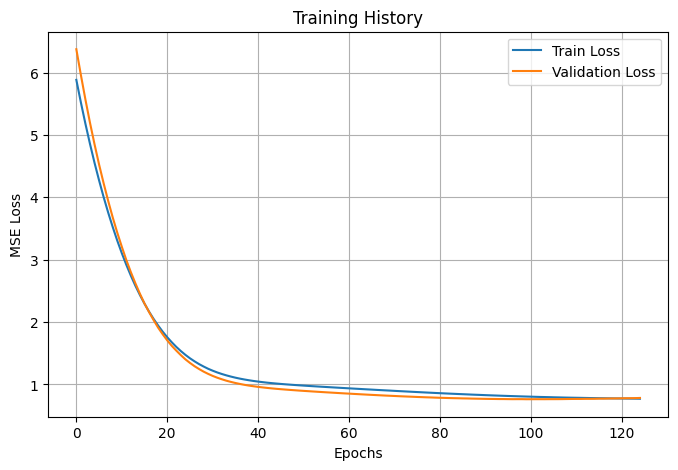

In [11]:
PlotHistory(history)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R²_Training = 0.33668671352689095
MSE_Training = 0.21765959218406405
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R²_Validation = -2.7354299590670332
MSE_Validation = 1.220174672025284
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R²_Test 1 = -2.452525290903454
MSE_Test 1 = 0.9844745726792132


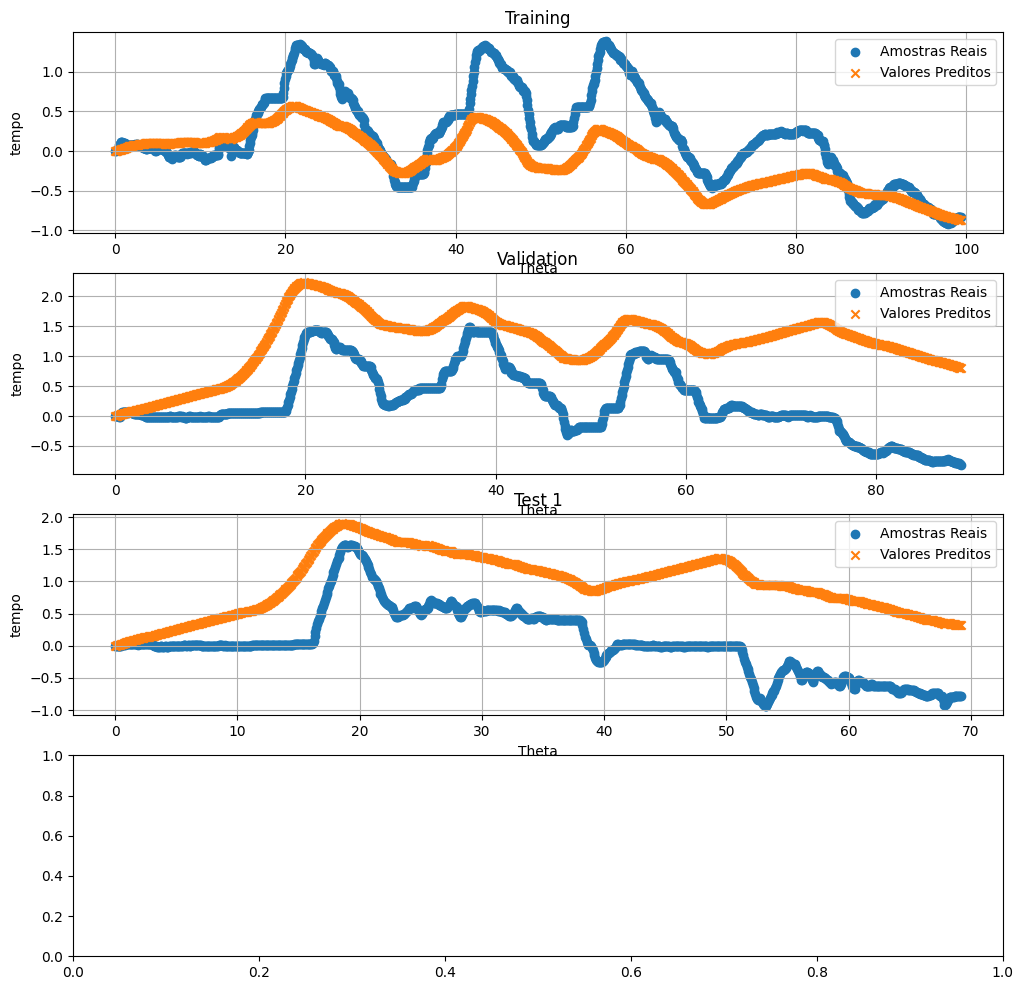

In [12]:
EvalModel(model)